In [29]:
import numpy as np
from pydataset import data
from pandas import get_dummies
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 150

In [2]:
iris = get_dummies(data("iris"))
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0


In [3]:
X, y = iris.iloc[:,:4].values, iris.iloc[:,4:].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [5]:
# Matrix of size nfeatures X nexamples containing the
# numerator of sigmoid-softmax function
Svals = np.exp(theta.T @ X_train)
# Column vector with cnexamples elements containing the normalization
# factor for the sigmoid-softmax activation function
onesvect = np.ones((1, nclasses))
Svalstot = onesvect @ Svals
Svalstot.shape

(1, 120)

In [7]:
# The probability for each example to belong to a class 'k'.
# Each row corresponds to a class and each column to a given
# training example
sigsoftk = Svals / Svalstot

In [8]:
# Initial Cost
-(y_train * np.log(sigsoftk)).sum() / X_train.shape[1]

1.0986122886681098

### Grad Test 

In [13]:
epsilon = 1e-10
onesvect = np.ones((1, nclasses))

for k in range(y_train.shape[0]):
    theta_plus = np.copy(theta)
    theta_plus[:,k] = theta_plus[:,k] + epsilon
    theta_minus = np.copy(theta)
    theta_minus[:,k] = theta_minus[:,k] - epsilon

    Svals_plus = np.exp(theta_plus.T @ X_train)
    sigsoftk_plus = Svals_plus / (onesvect @ Svals_plus)

    Svals_minus = np.exp(theta_minus.T @ X_train)
    sigsoftk_minus = Svals_minus / (onesvect @ Svals_minus)
    
    cost_plus = -(y_train * np.log(sigsoftk_plus)).sum(axis=1) / X_train.shape[1]
    cost_minus = -(y_train * np.log(sigsoftk_minus)).sum(axis=1) / X_train.shape[1]

    grad = (cost_plus - cost_minus) / (2 * epsilon)
    print(f"Numerical grad for class {k}: {grad}")

Numerical grad for class 0: [-2.5399996   1.5550003   1.71249986]
Numerical grad for class 1: [ 1.26999994 -3.1099992   1.71249986]
Numerical grad for class 2: [ 1.26999994  1.5550003  -3.42499973]


In [18]:
# Matrix of size nfeaturesXnclasses to hold the parameters
# of each class
nfeatures = X_train.shape[0]
nclasses = y_train.shape[0]
theta = np.zeros((nfeatures, nclasses))

cost_hist = []
alpha = 0.1
for i in range(20_000):
    grads = np.zeros_like(theta)
    for k in range(y_train.shape[0]):
        grad = ((sigsoftk - y_train)[k,:] * X_train).sum(axis=1) / X_train.shape[1]
        grads[:,k] = grad
    
    theta = theta - alpha * grads
    Svals = np.exp(theta.T @ X_train)
    Svalstot = onesvect @ Svals
    sigsoftk = Svals / Svalstot
    cost = -(y_train * np.log(sigsoftk)).sum() / X_train.shape[1]
    cost_hist.append(cost)
    if i % 500 == 0:
        print(f"Cost at iteration {i}: {cost}")

Cost at iteration 0: 1.0985856498258875
Cost at iteration 500: 0.18502418452060437
Cost at iteration 1000: 0.13898223732332543
Cost at iteration 1500: 0.12014506276350329
Cost at iteration 2000: 0.10981390123033943
Cost at iteration 2500: 0.10327810829048215
Cost at iteration 3000: 0.09877583788663886
Cost at iteration 3500: 0.09549335052892814
Cost at iteration 4000: 0.0930010586172612
Cost at iteration 4500: 0.09105009839464312
Cost at iteration 5000: 0.08948607783886589
Cost at iteration 5500: 0.0882080325987491
Cost at iteration 6000: 0.08714711879676601
Cost at iteration 6500: 0.08625477141600495
Cost at iteration 7000: 0.08549575151739401
Cost at iteration 7500: 0.08484387485526979
Cost at iteration 8000: 0.08427928623237495
Cost at iteration 8500: 0.08378666309542337
Cost at iteration 9000: 0.08335399814376761
Cost at iteration 9500: 0.08297175408264262
Cost at iteration 10000: 0.0826322641275224
Cost at iteration 10500: 0.08232929871288527
Cost at iteration 11000: 0.08205774701

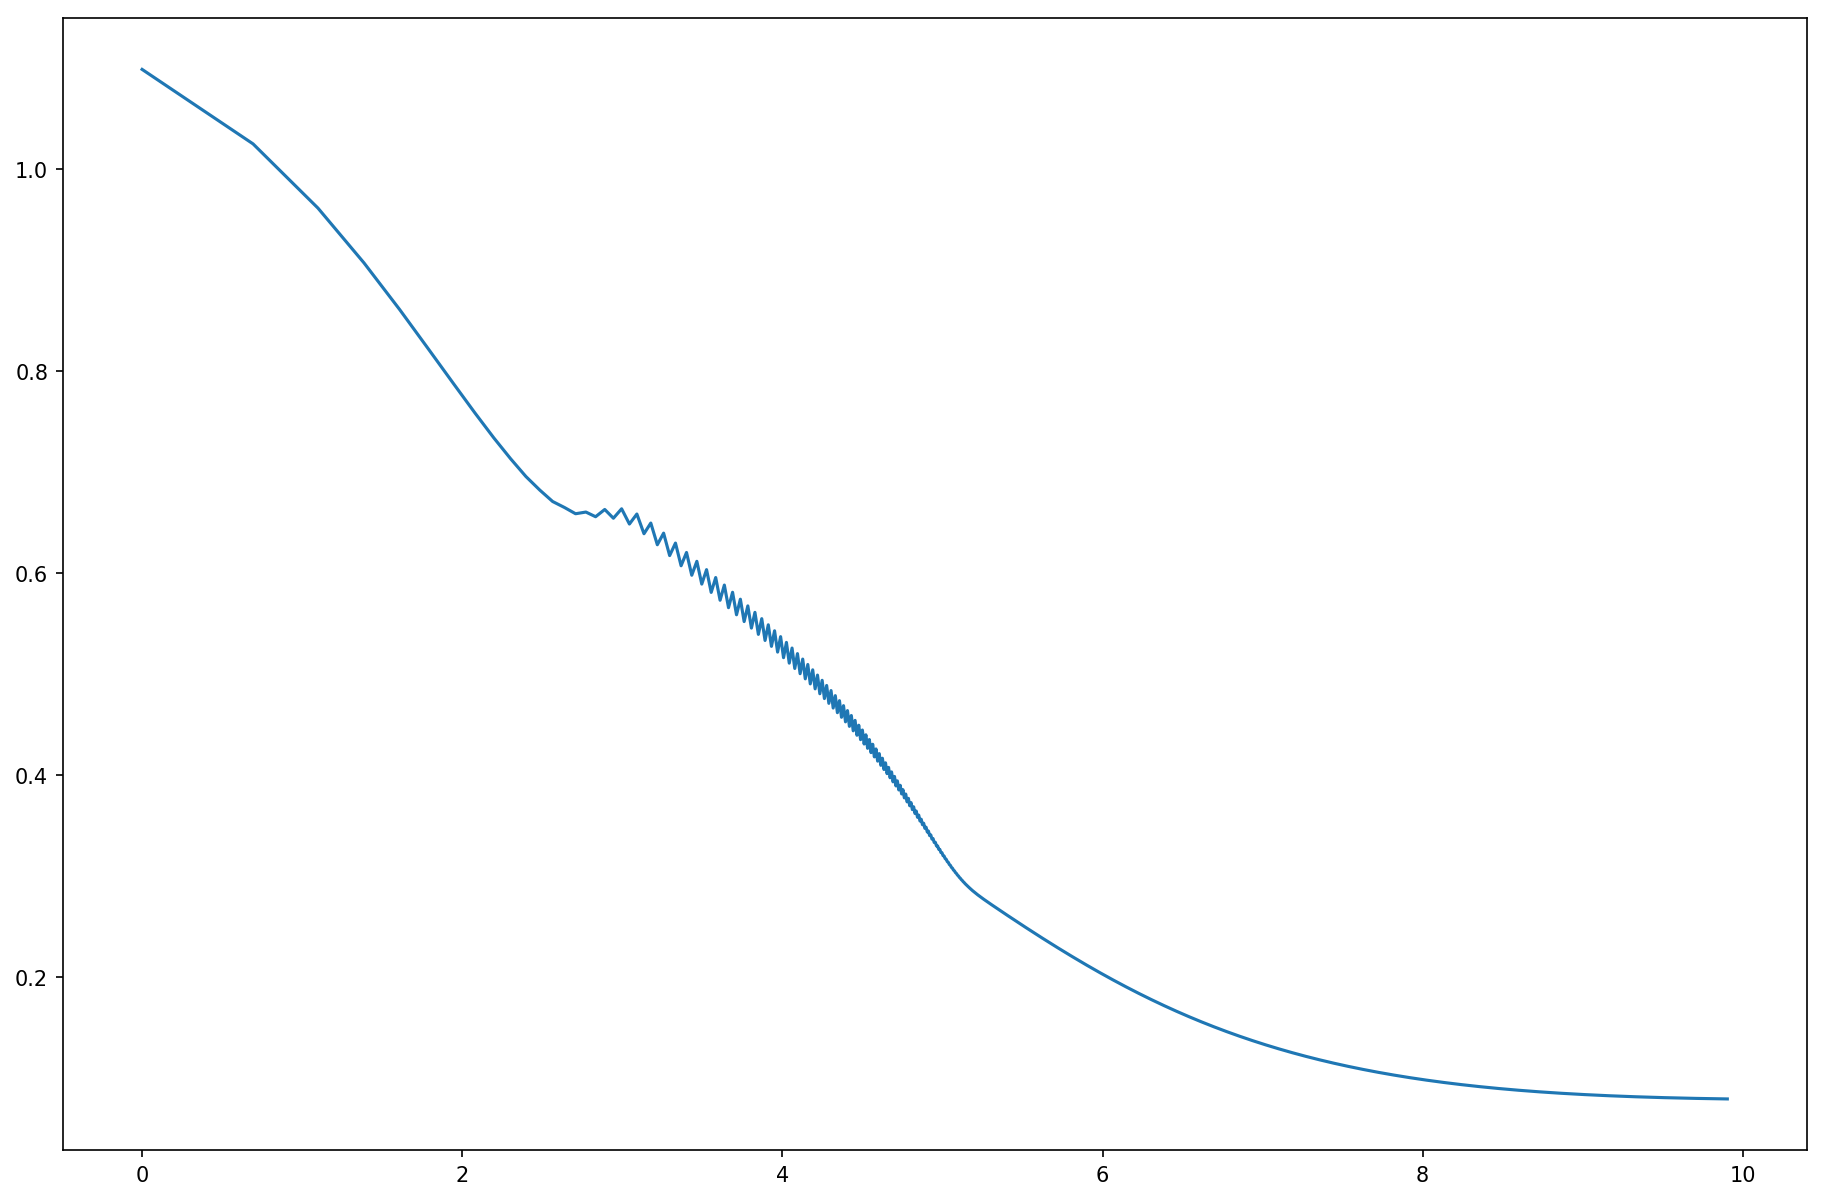

In [31]:
plt.plot(np.log(range(1, len(cost_hist) + 1)), cost_hist)